<h1>How to Build a Decision Tree</h1>

<h3>
    What makes a Good Split
</h3>

<p>
    In order to determine which feature we should split on first, we need to score every possible split so we can choose the split with the highest score. Our goal would be to perfectly split the data.
</p>

<p>
    If, for instance, all women survived an incident and all men didn’t survive, splitting on Sex would be a perfect split.
</p>

<p>
    This is rarely going to happen with a real dataset, but we want to get as close to this as possible.
</p>

<p>
    Let’s consider a couple possible splits for the Titanic dataset. We’ll see how it splits the data and why one is better than the other:
</p>

<ul>
    <li>First, let’s trying splitting on Age.<br/>Since Age is a numerical feature, we need to pick a threshold to split on. Let’s say we split on Age<=30 and Age>30.<br/>Let’s see how many passengers we have on each side, and how many of them survived and how many didn’t.</li>
</ul>

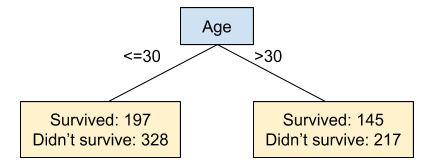

In [1]:
from IPython.display import Image, display
image_path = './images/example_age_split.jpg'
display(Image(filename=image_path))

<strong>On both sides, we have about 40% of the passengers surviving. Thus we haven’t really gained anything from splitting the data this way.</strong>

<ul>
    <li>Now let’s try splitting on Sex</li>
</ul>

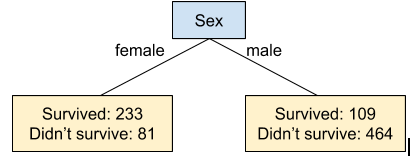

In [2]:
from IPython.display import Image, display
image_path = './images/example_sex_split.jpg'
display(Image(filename=image_path))

<strong>We can see on the female side that the vast majority survived. On the male side, the vast majority didn’t survive. This is a good split.</strong>

<p>
    What we’re going for is <strong>homogeneity</strong> (or <strong>purity</strong>) on each side. Ideally we would send all the passengers who survived to one side and those who didn’t survive to the other side.
</p>

<p>
    To achieve this we use a mathematical measure called <strong>information gain</strong>.
</p>

<h3>Gini Impurity</h3>

<p>
    Gini impurity is a measure of how pure a set is. and it can later be used to calculate the information gain of a certain split.
</p>
<p>
    The Gini impurity will be <strong>a value between 0 and 0.5 where 0.5 is completely impure</strong> (50% survived and 50% didn’t survive) and 0 is completely pure (100% in the same class).<br/> So the lower this value is the more informative a considered split would be.
</p>

<p>The formula for gini is as follows.</p>

$$gini = {2\:. p\:. (1 - p)}$$

<strong>Where p is the percent of passengers who survived. Thus (1-p) is the percent of passengers who didn’t survive.</strong>

<p>The graph below shows that:</p> 
<ul>
    <li>The maximum value of the gini impurity is 0.5 when exactly 50% of the passengers in the set survived</li>
    <li>If all the passengers survived or didn’t survive (percent is 0 or 1), then the value is 0</li>
</ul>

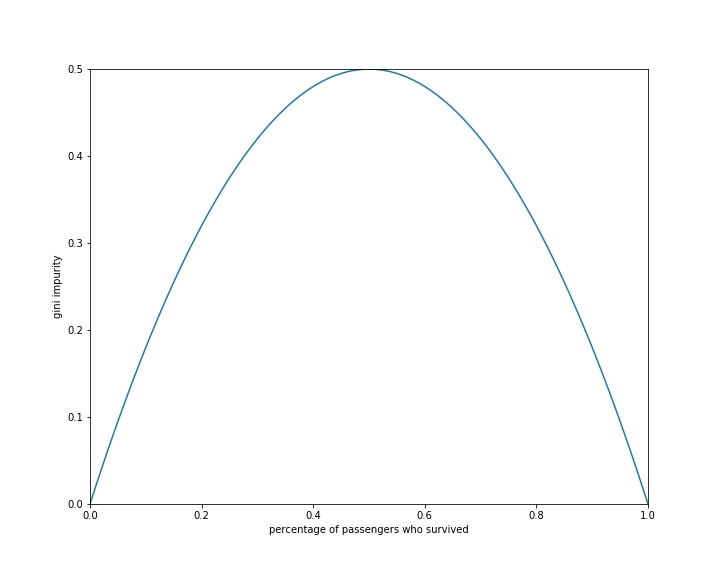

In [3]:
from IPython.display import Image, display
image_path = './images/gini_impurity_graph.jpg'
display(Image(filename=image_path))

<p>Let’s calculate the gini impurity for our examples:</p>
<ul>
    <li>First we had a split on Age<=30 and Age>30.</li>
</ul>

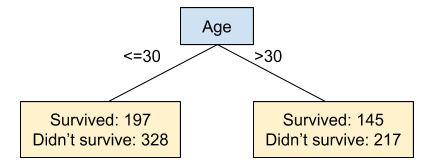

In [4]:
from IPython.display import Image, display
image_path = './images/example_age_split.jpg'
display(Image(filename=image_path))

<p>
    On the left, for the passengers with Age<=30, we first calculate the percent of passengers who survived:
</p>
        
$${Percent\: of\: passengers\: who\: survived\: = 197/(197+328)) = 0.3752}$$

$${Percent\: of\: passengers\: who\: didn’t\: survive\: = 1 - 0.375 = 0.6248}$$

<p>Now let’s use that to calculate the gini impurity:</p>

$$Percent\: of\: passengers\: who\: survived\: = {2\:* 0.3752 \:* 0.6248 = 0.4689}$$

<strong>
    We can see that this value is close to 0.5, the maximum value for gini impurity. This means that the set is impure.
</strong>

<p>
    Now let’s calculate the gini impurity for the right side, passengers with Age>30:
</p>

$${2 \:* 145/(145+217) \:* 217/(145+217) = 0.4802}$$

<strong>
    This value is also close to 0.5, so again we have an impure set.
</strong>

<ul>
    <li>Now let’s look at the gini values for the other split we tried, splitting on Sex:</li>
</ul>

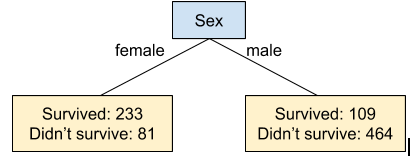

In [5]:
from IPython.display import Image, display
image_path = './images/example_sex_split.jpg'
display(Image(filename=image_path))

<p>On the left side, for female passengers, we calculate the following value for the gini impurity</p>

$${2\: *\: 233/(233+81)\: *\: 81/(233+81)\: = 0.3828}$$

<p>On the right side, for male passengers, we get the following value</p>

$${2\: *\: 109/(109+464)\: *\: 464/(109+464)\: = 0.3081}$$

<strong>
    Both of these values are smaller than the gini values for splitting on Age, so we determine that splitting on the Sex feature is a better choice.
</strong>

<p>
    Right now we have two values for each potential split. The information gain will be a way of combining them into a single value.
</p>

<h3>Entropy</h3>

<p>Entropy is another measure of purity.</p>

<p>It will be a <strong>value between 0 and 1 where 1 is completely impure</strong> (50% survived and 50% didn’t survive) and 0 is completely pure (100% the same class).</p>

<p>The formula for entropy is given below:</p>

$$entropy = {-\:[p\:log_2\:p + (1\:-\:p)\:log_2(1-p)]}$$

<strong>Where p is the percent of passengers who survived.</strong>

<p>The graph below has a similar shape to the gini function and shows that:</p> 
<ul>
    <li>
        Like the gini impurity, the maximum value is when 50% of the passengers in our set survived, and the minimum value is when either all or none of the passengers survived.    
    </li>
    <li>
        The shape of the graphs are a little different. You can see that the entropy graph is a little fatter.    
    </li>
</ul>

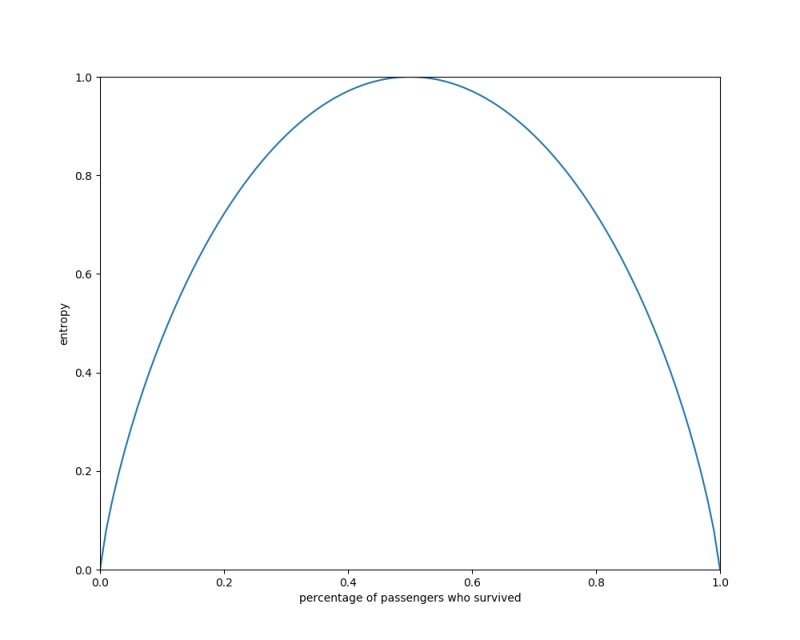

In [6]:
from IPython.display import Image, display
image_path = './images/entropy_impurity_graph.jpg'
display(Image(filename=image_path))

<p>Now let’s calculate the entropy values for the same two potential splits.</p>
<ul>
    <li>First we had a split on Age<=30 and Age>30.</li>
</ul>

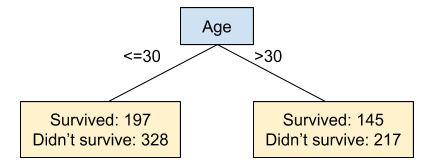

In [7]:
from IPython.display import Image, display
image_path = './images/example_age_split.jpg'
display(Image(filename=image_path))

<p>On the left (Age<=30):</p>
    
$$p = {197/(197+328) = 0.3752}$$
    
$$entropy = {-(0.375\: *\: log(0.375)\: +\: (1-0.375)\: *\: log(1-0.375)) = 0.9546}$$

<p>on the right (Age>30):</p>

$$p = {145/(145+217) = 0.4006}$$

$$entropy = {-(0.401\: *\: log(0.401)\: +\: (1-0.401)\: *\: log(1-0.401)) =  0.9713}$$

<strong>These values are both close to 1, which means the sets are impure.</strong>

<ul>
    <li>Now let’s do the same calculate for the split on the Sex feature.</li>
<ul>

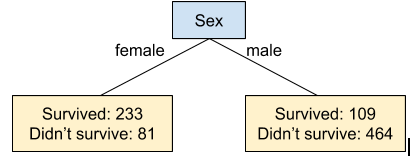

In [8]:
from IPython.display import Image, display
image_path = './images/example_sex_split.jpg'
display(Image(filename=image_path))

<p>On the left (Age<=30):</p>
$$p = {233/(233+81) = 0.7420}$$
$$entropy = {-(0.7420\: *\: log(0.7420)\: +\: (1-0.7420)\: *\: log(1-0.7420)) = 0.8237}$$


<p>on the right (Age>30):</p>
$$p = {109/(109+464) = 0.1902}$$
$$entropy = {-(0.1902\: *\: log(0.1902)\: +\: (1-0.1902)\: *\: log(1-0.1902)) = 0.7019}$$

<strong>You can see that these entropy values are smaller than the entropy values above, so this is a better split.</strong>

<strong>
It’s not obvious whether gini or entropy is a better choice.<br/>It often won’t make a difference, but you can always cross validate to compare a Decision Tree with entropy and a Decision Tree with gini to see which performs better.
<strong>

<h3>Information Gain</h3>

<p>Now that we have a way of calculating a numerical value for impurity, we can define <strong>information gain</strong>.</p>

$$Information Gain = H(S) - \frac{|A|}{|S|} H(A) - \frac{|B|}{|S|} H(B)$$

<p>Where:</p>
<ul>
    <li>H is our impurity measure (either Gini impurity or entropy)</li>
    <li>S is the original dataset</li>
    <li>A and B are the two sets we’re splitting the dataset S into</li>
    <li>|A| means the size of A</li>
</ul>

<p>Let’s calculate this value for our two examples. using the Gini impurity as our impurity measure.</p>

<ul>
    <li>We start with the age split at 30 years</li>
</ul>

<p>
    We’ve already calculated most of the Gini impurity values, though we need to calculate the Gini impurity of the whole set.<br />There are 342 passengers who survived and 545 passengers who didn’t survive, out of a total of 887 passengers, so the gini impurity is as follows:
</p>

$$gini = {2 * 342/887 * 545/887) =  0.4738}$$

<p>
    pulling in the gini impurity values that we calculated before, we get the following information gain:
</p>

$$Information Gain = 0.4738 - \frac{525}{887} * 0.4689 - \frac{362}{887} * 0.4802 = 0.0003$$

<strong>This value is very small meaning we gain very little from this split.</strong>

<ul>
    <li>Now let’s calculate the information gain for splitting on Sex.</li>
</ul>
<p>We have 233+81=314 passengers on the left (female) and 109+464=573 passengers on the right (male). Here is the information gain:</p>

$$Information Gain = 0.4738 - \frac{314}{887} * 0.3828 - \frac{573}{887} * 0.3081 = 0.1393$$

<strong>
    Thus we can see that the information gain is much better for this split. Therefore, splitting on Sex is a much better choice when building our decision tree than splitting on Age with threshold 30.
</strong>

<strong>
    The work we did was just to compare two possible splits.<br/>
    We’ll need to do the same calculations for every possible split in order to find the best one.<br/>
    Luckily we don’t have to do the computations by hand!
</strong>

<h3>Building the Decision Tree</h3>

<p>We’ve built up the foundations we need for building the Decision Tree. Here’s the process we go through:</p>

<ul>
    <li>
        To determine how to do the first split, we go over every possible split and calculate the information gain if we used that split.
    </li>
    <li>
        For numerical features like Age, PClass and Fare, we try every possible <strong>threshold</strong>.<br/>
        Splitting on the Age threshold of 50 means that datapoints with Age<=50 are one group and those with Age>50 are the other.
    </li>
    <li>
        Thus since there are 89 different ages in our dataset, we have 88 different splits to try for the age feature!
    </li>
</ul>

<ul>
    <li>There is 1 potential split for Sex</li>
    <li>2 potential splits for Pclass</li>
    <li>88 potential splits for Age</li>
    <li>There are 248 different values for Fare, so there are 247 potential splits for this feature</li>
</ul>
<strong>If we’re only considering these four features, we have 1 + 2 + 88 + 247 = 338 potential splits to consider.</strong>
<p>For each of these splits we calculate the information gain and we choose the split with the highest value.</p>
<p>And then, we do the same thing for the next level.</p>

<p>
    We can split on the same feature twice if that feature has multiple possible thresholds.<br/>
    Sex can only be split on once, but the Fare and Age features can be split on many times.
</p>

<p>
    If we split at sex first, we independently do a similar calculation for the male passengers and choose the split with the highest information gain. Thus we may have a different second split for male passengers and female passengers.
</p>

<p>We continue doing this process until we have no more features to split on.</p>

<strong>
This is a lot of things to try, but we just need to throw computation power at it. It does make Decision Trees a little slow to build, but once the tree is built, it is very fast to make a prediction.
</strong>